In [1]:
from sklearn import tree
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split as tts 

In [2]:
wine = load_wine()
wine 

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.9259259259259259

In [5]:
from sklearn.model_selection import cross_val_score
clf1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
scores = cross_val_score(clf1, X, y, cv=5)
scores.mean()

0.8820634920634921

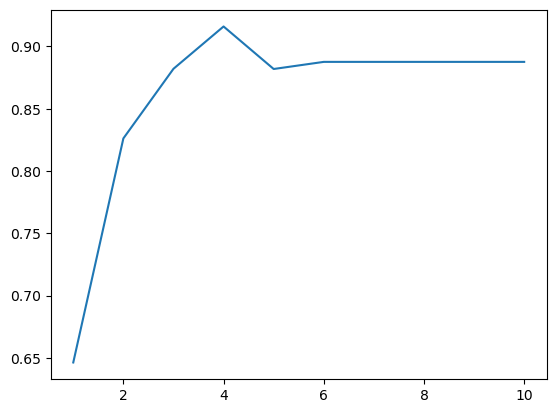

In [6]:
scores = []
depth = []
for i in range(0, 10):
    clf= tree.DecisionTreeClassifier(criterion='gini', max_depth = i+1, random_state=1)
    score = cross_val_score(clf, X,y,cv=5,scoring='accuracy')
    scores.append(score.mean())
    depth.append(i+1)
# print(scores)


import matplotlib.pyplot as plt
plt.plot(depth, scores)
plt.show()
    

In [7]:
import numpy as np
imp = clf.fit(X_train, y_train).feature_importances_
[*zip(wine.feature_names,imp)]

[('alcohol', 0.0679824561403509),
 ('malic_acid', 0.024111111111111114),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.37183383991894625),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.023647992530345427),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.1055713952247566),
 ('proline', 0.40685320507448963)]

In [8]:
sorted = np.argsort(imp)[::-1]
for i,idx in enumerate(sorted):
    print('%s) %s %.3f'%(i+1,wine.feature_names[idx], imp[idx]))

1) proline 0.407
2) flavanoids 0.372
3) od280/od315_of_diluted_wines 0.106
4) alcohol 0.068
5) malic_acid 0.024
6) color_intensity 0.024
7) hue 0.000
8) proanthocyanins 0.000
9) nonflavanoid_phenols 0.000
10) total_phenols 0.000
11) magnesium 0.000
12) alcalinity_of_ash 0.000
13) ash 0.000


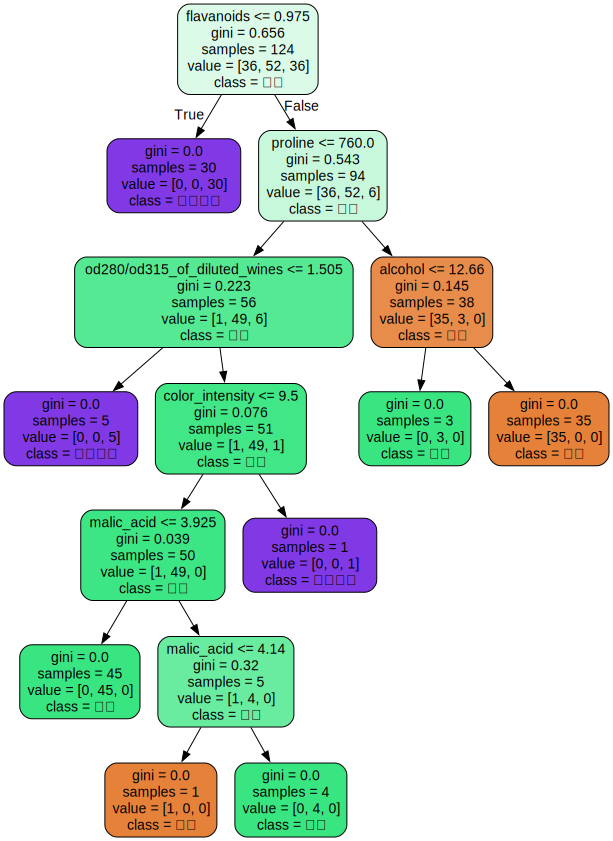

In [9]:
import graphviz 
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names= wine.feature_names,
    class_names=["琴酒","雪莉","贝尔摩德"],
    filled = True,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph

In [10]:
gini_thresholds = np.linspace(0, 0.5,20)
parameters = {
    'splitter':('best', 'random'),
    'criterion':('gini', 'entroph'),
    'max_depth':[*range(1,10)],
    'min_samples_leaf':[*range(1,50,5)],
    'min_impurity_decrease':[*np.linspace(0,0.5,20)]
}
clf = tree.DecisionTreeClassifier(random_state=1)
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(clf, parameters, cv=5)
gs.fit(X_train, y_train)
gs.best_params_

c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18000 fits failed out of a total of 36000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\su_yu\anaconda3\Lib\site-packages\sklearn\base.py

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [11]:
gs.best_score_

0.9193333333333333

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification 
from sklearn.tree import DecisionTreeClassifier

In [15]:
X, y = make_classification(n_samples = 100,
                           n_features = 2, 
                           n_redundant= 0,
                           n_informative = 2,
                           random_state=1,
                           n_clusters_per_class = 1
                           )

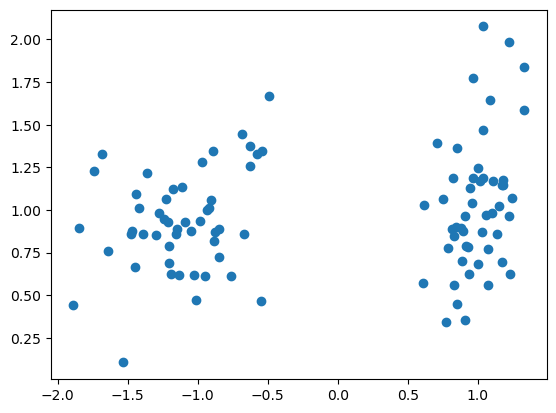

In [16]:
plt.scatter(X[:, 0], X[:, 1],label="X")
plt.show()

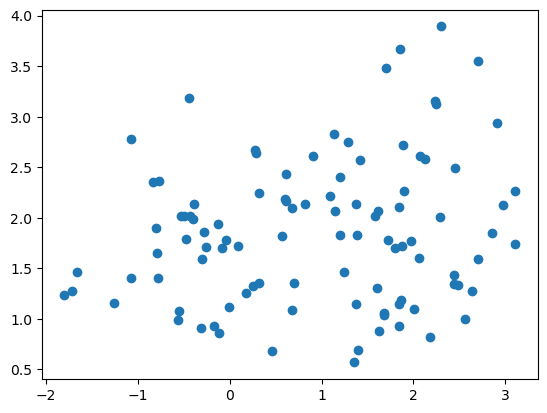

In [17]:
rng = np.random.RandomState(seed=2)
X +=2 * rng.uniform(size=X.shape)
plt.scatter(X[:, 0], X[:, 1],label="X")
lineary_separable = (X, y)

In [18]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            lineary_separable]


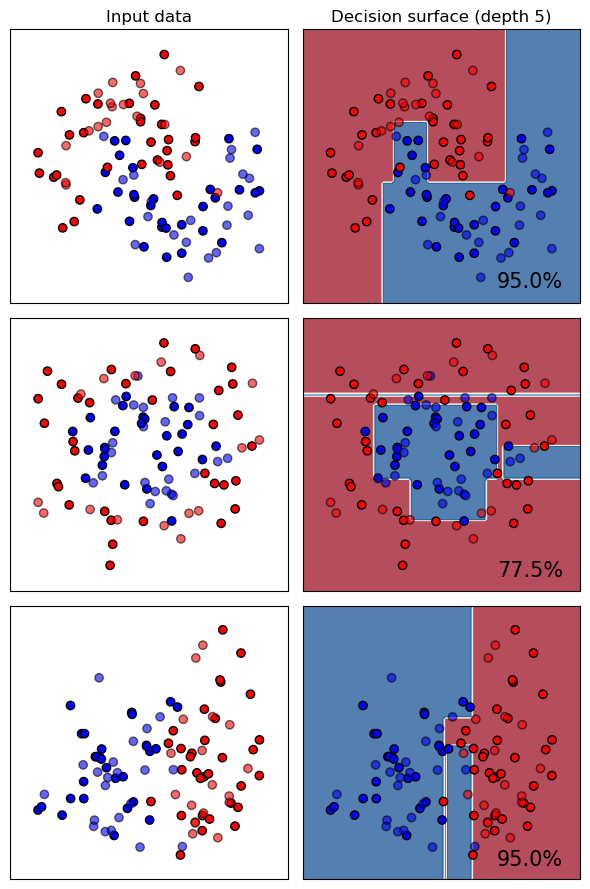

In [34]:
figure = plt.figure(figsize=(6, 9))
i = 1
for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x1_min, x1_max = X[:, 0].min()-0.5, X[:,0].max()+0.5
    x2_min, x2_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                               np.linspace(x2_min, x2_max, 100))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets),2,i)

    if ds_index == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train,
               cmap=cm_bright, edgecolors='k')
    
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test,
               cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx1.min(),xx1.max())
    ax.set_ylim(xx2.min(),xx2.max())

    ax.set_xticks(())
    ax.set_yticks(())
    i +=1
    ax = plt.subplot(len(datasets), 2, i)
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score= clf.score(X_test, y_test)

    Z = clf.fit(X_train, y_train).predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, cmap=cm, alpha=0.75)

    ax.scatter(X_train[:,0], X_train[:,1], c=y_train,
               cmap=cm_bright, edgecolors='k')
    
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test,
               cmap=cm_bright, edgecolors='k', alpha=0.6)
    if ds_index == 0:
        ax.set_title("Decision surface (depth {})".format(clf.max_depth))

    ax.text(xx1.max()-0.3, xx2.min() +0.3, ('{:.1f}%'.format(score*100)), 
            size=15, horizontalalignment='right')
    ax.set_xticks(())
    ax.set_yticks(())
    i +=1
plt.tight_layout()
plt.show()